### Kronecker graphs preliminaries.

The corresponding paper could be found [here](https://www.jmlr.org/papers/volume11/leskovec10a/leskovec10a.pdf).

__Kronecker graph definition__: a Kronecker graph is defined by its adjacency matrix $C = \bigotimes_{i=1}^N C'$, where $C'$ is the adjacency matrix of an initiator graph.

They exhibit many properties of real-world large networks such as web graphs, social networks, biological networks, etc, and often used as their mathematical models.

__Observation__: if $C'$ is Pauli sparse, then $C$ is also Pauli sparse.

Let us compute the ratio $\alpha$ between number of non-zero Pauli strings in $C$ and the total number of Pauli strings necessary to decompose an arbitrary matrix of the same size. Let us assume, that $C' \in \mathbb{R}^{2^n\times 2^n}$ can be decomposed into $m$ Pauli strings. Then, by the Kronecker graph definition, $C$ can be decomposed into $m^N$ while the total number of Pauli strings necessary to decompose an arbitrary matrix of size $2^{nN} \times 2^{nN}$ is $4^{nN}$. Thus $$\alpha = \left(\frac{m}{4^n}\right)^N$$, i.e. the number of Pauli strings is exponentially suppressed.

### Example

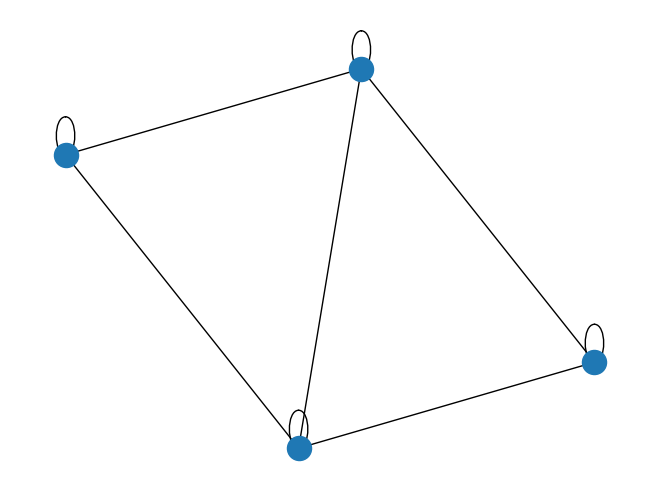

In [1]:
import networkx as nx  # pip install networkx
from pgd_utils import PSDecomposer  # see ReadMe.md


# Let us generate a simple initiator graph g_prime
# 0 --- 1
# |   / |
# | /   |
# 3 --- 2

g_prime  = nx.Graph()
g_prime.add_node(0)
g_prime.add_node(1)
g_prime.add_node(2)
g_prime.add_node(3)
# self loops to make kronecker graph 100% connected
g_prime.add_edge(0, 0)
g_prime.add_edge(1, 1)
g_prime.add_edge(2, 2)
g_prime.add_edge(3, 3)
g_prime.add_edge(0, 1)
g_prime.add_edge(1, 2)
g_prime.add_edge(2, 3)
g_prime.add_edge(3, 0)
g_prime.add_edge(0, 2)
nx.draw(g_prime)

Now let us decompose the adjacency matrix of the initiator graph into Pauli strings

In [2]:
ps_decomposer = PSDecomposer()
for (id1, id2) in g_prime.edges:
    ps_decomposer.add_edge(id1, id2, 1.)
ps_decomposer.pauli_overlap(2)
ps_decomposition = ps_decomposer.decompose()
for (order, (pstrs, weights)) in enumerate(ps_decomposition):
    print(f"For order {order} one has pauli strings {pstrs} with weights {weights}")

For order 0 one has pauli strings [II] with weights [1.]
For order 1 one has pauli strings [XI, IX] with weights [1.  0.5]
For order 2 one has pauli strings [XX, ZX] with weights [1.  0.5]


One can see that initiator graph can be decomposed into 5 Pauli strings. Let us build a Kronecker graph for the initiator graph.

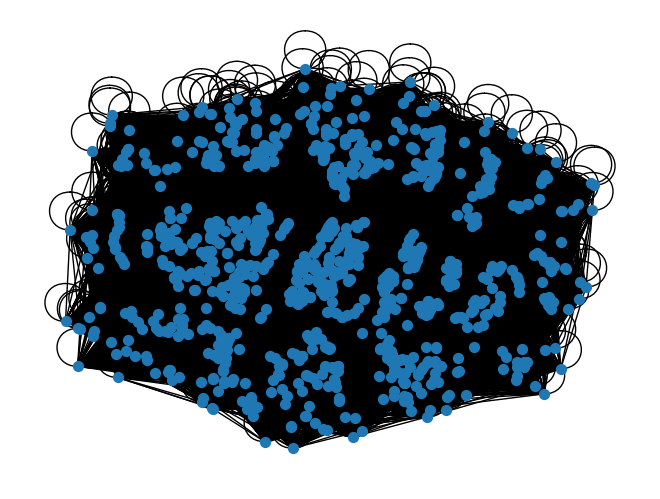

In [52]:
from functools import reduce
from itertools import repeat

N = 5

g = reduce(nx.tensor_product, repeat(g_prime, N - 1), g_prime)
nx.draw(g, nx.spring_layout(g), node_size=50)

Let us now decompose the obtained Kronecker graph into Pauli strings

In [ ]:
# Don't pay attention on this piece of code, this is just relabeling of nx.graph nodes

def inorder_tree_traverser(t):
    if isinstance(t, int):
        yield t
    elif isinstance(t, tuple):
        for elem in t:
            yield from inorder_tree_traverser(elem)
    else:
        assert False

class Tuple2Int:
    def __init__(self):
        pass
    def get(self, t, _ = None):
        return self._get(tuple(inorder_tree_traverser(t)), _)
    def _get(self, t, _):
        if t:
            return t[0] + 4 * self._get(t[1:], _)
        else:
            return 0

g = nx.relabel_nodes(g, Tuple2Int())

# -------------------------------------------------------------------------------------

ps_decomposer = PSDecomposer()

for (id1, id2) in g.edges:
    ps_decomposer.add_edge(id1, id2, 1.)
ps_decomposer.pauli_overlap(2)
ps_decomposition = ps_decomposer.decompose()
number_of_pauli_strings = 0
for (order, (pstrs, weights)) in enumerate(ps_decomposition):
    print(f"For order {order} one has pauli strings {pstrs} with weights {weights}")
    number_of_pauli_strings += len(pstrs)
print(f"Total number of Pauli strings is {number_of_pauli_strings}")

For order 0 one has pauli strings [IIIIIIIIII] with weights [1.]
For order 1 one has pauli strings [XIIIIIIIII, IXIIIIIIII, IIXIIIIIII, IIIXIIIIII, IIIIXIIIII, IIIIIXIIII, IIIIIIXIII, IIIIIIIXII, IIIIIIIIXI, IIIIIIIIIX] with weights [1.  0.5 1.  0.5 1.  0.5 1.  0.5 1.  0.5]
For order 2 one has pauli strings [XXIIIIIIII, ZXIIIIIIII, XIXIIIIIII, IXXIIIIIII, XIIXIIIIII, IXIXIIIIII, IIXXIIIIII, IIZXIIIIII, XIIIXIIIII, IXIIXIIIII, IIXIXIIIII, IIIXXIIIII, XIIIIXIIII, IXIIIXIIII, IIXIIXIIII, IIIXIXIIII, IIIIXXIIII, IIIIZXIIII, XIIIIIXIII, IXIIIIXIII, IIXIIIXIII, IIIXIIXIII, IIIIXIXIII, IIIIIXXIII, XIIIIIIXII, IXIIIIIXII, IIXIIIIXII, IIIXIIIXII, IIIIXIIXII, IIIIIXIXII, IIIIIIXXII, IIIIIIZXII, XIIIIIIIXI, IXIIIIIIXI, IIXIIIIIXI, IIIXIIIIXI, IIIIXIIIXI, IIIIIXIIXI, IIIIIIXIXI, IIIIIIIXXI, XIIIIIIIIX, IXIIIIIIIX, IIXIIIIIIX, IIIXIIIIIX, IIIIXIIIIX, IIIIIXIIIX, IIIIIIXIIX, IIIIIIIXIX, IIIIIIIIXX, IIIIIIIIZX] with weights [1.   0.5  1.   0.5  0.5  0.25 1.   0.5  1.   0.5  1.   0.5  0.5  0.25
 0.5  

One can see that total number of non-zero Pauli strings is 3125 = $5^5$, which agrees with order 5 of Kronecker graph and 5 non-zero Pauli strings for initiator graph 